## Edge detecction Mathematical Morphology  

Name: Lisbeth Corbacho Carazas

https://theailearner.com/tag/hysteresis-thresholding/

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt
from skimage import color
import morphological_operators_fuzzy as mof
import operators_fuzzy as of 
import functions_plots as fp
import op_edge_detector as ed
from skimage import data, filters
#from scipy.fftpack import fftshift, ifftshift
#import Hysteresis_MedinaCarciner as histmedcar
from phasecong import phasecong 
import Hysterese_canny as ht 
import Fom as fm
from sklearn.metrics import f1_score

C:\Users\lisy_\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Folder Path
#dir_carpeta = "C:/Users/lisy_/Desktop/PROG_ARTICULOS/Python-Articulo_2/Base_tese/aerial"
dir_carpeta = "C:/Users/lisy_/Desktop/PROG_ARTICULOS/Python-Articulo_2/Base_tese/objects"
list_imagens=os.listdir(dir_carpeta)

#print(list_imagens)

In [3]:
from skimage.io import imread

imagens_gray={}
imagens_ground={}

for i in range(0,len(list_imagens),2):
    
    #reading images
    
    imagem = cv.imread(dir_carpeta +'/'+ str(list_imagens[i]))
    imagem= cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
    
    label = str(list_imagens[i])
    imagens_gray[label] = imagem
    
    # reading  groundTrue images
    
    imagem_GT = cv.imread(dir_carpeta +'/'+ str(list_imagens[i+1]))
    imagem_GT= cv.cvtColor(imagem_GT, cv.COLOR_BGR2GRAY)
    
    label_GT =str(list_imagens[i+1])
    
    #imagens_ground[label_GT] = imagem_GT
    #Adicionando threshhod to imagenes
    #print(np.max(np.max(imagem_GT)))
    
    ret,thresh = cv.threshold(imagem_GT,4.9,255,cv.THRESH_BINARY)
    thresh =255-thresh
    imagens_ground[label_GT] = thresh
    
    #Show imagens
    #fp.plot_3Images(imagem, imagem_GT, thresh, label, label_GT)
    

In [4]:
# Criando um diccionario de imagens gray e ground true

imagens_gray_ground = {list(imagens_gray.keys())[i]:[list(imagens_gray.values())[i], 
                                                     list(imagens_ground.values())[i]] 
                       for i in range(len(list(imagens_gray.keys())))}

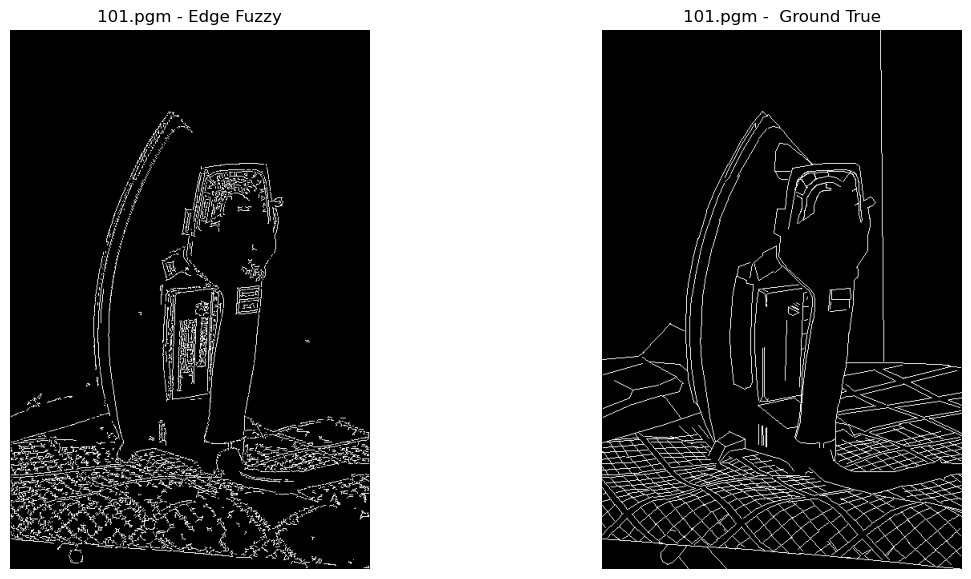

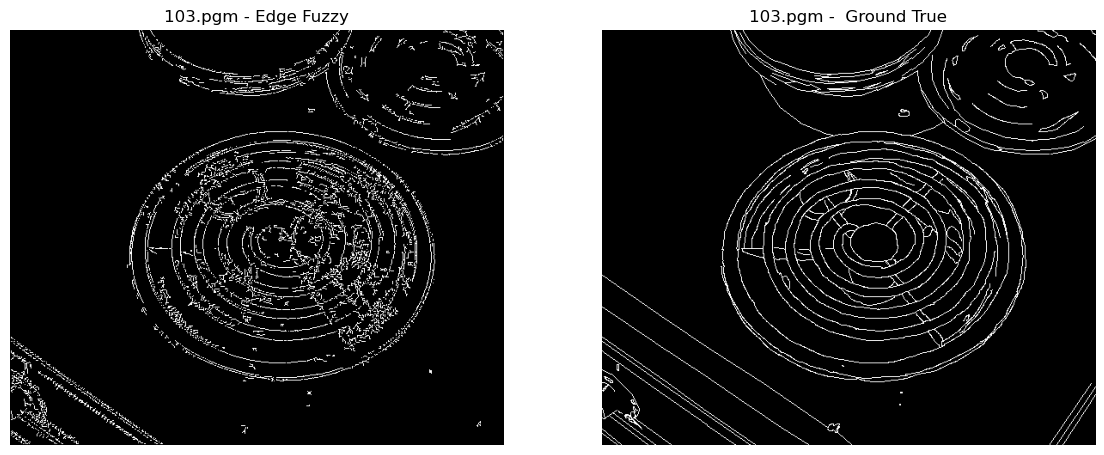

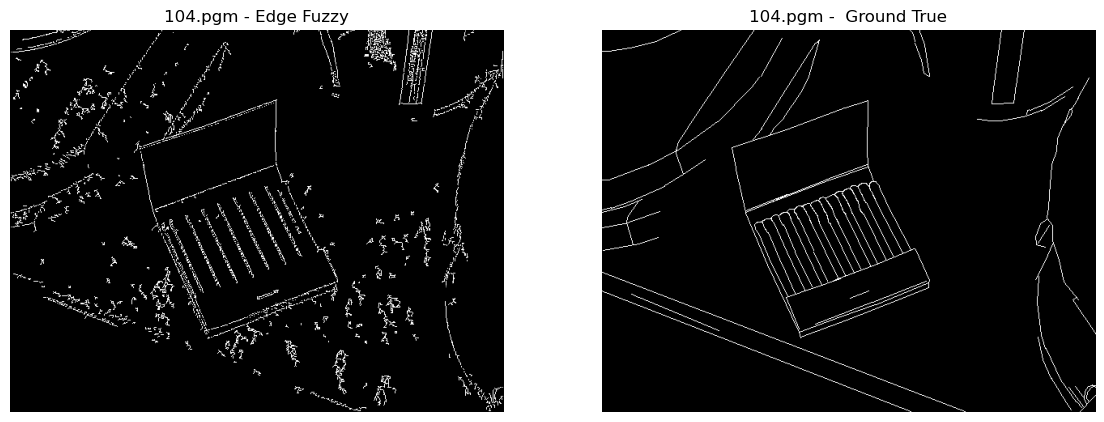

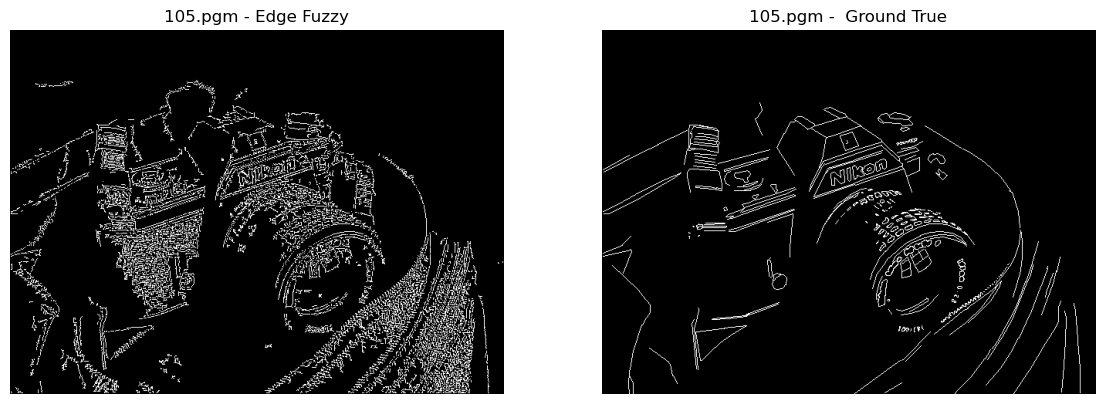

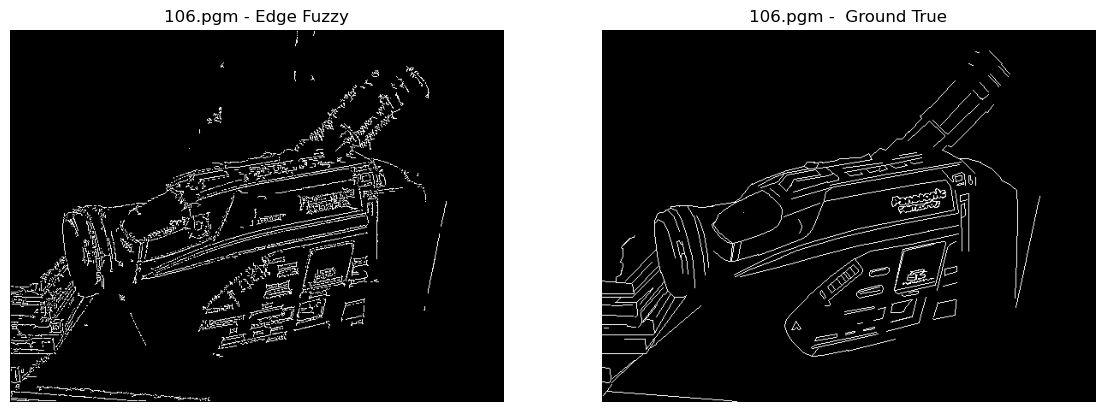

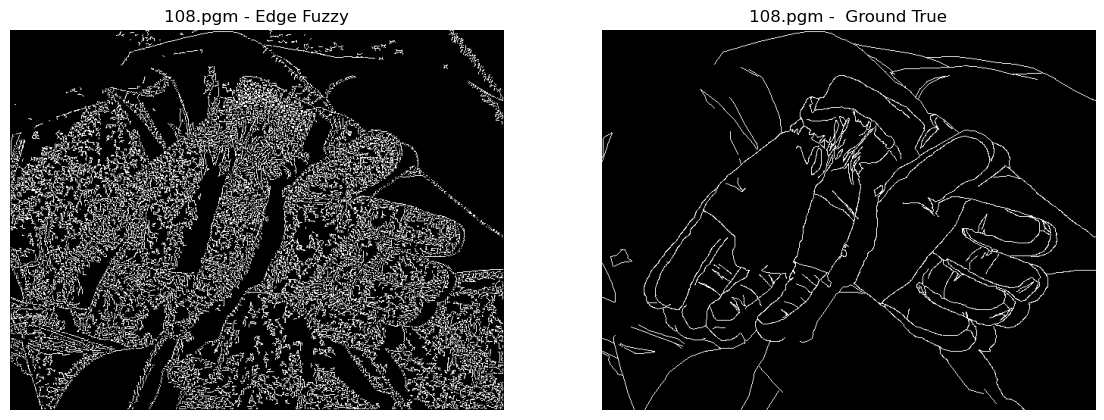

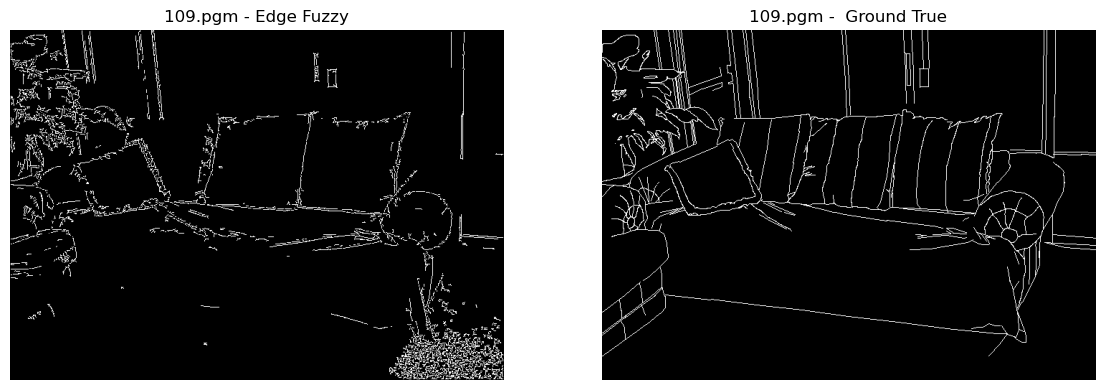

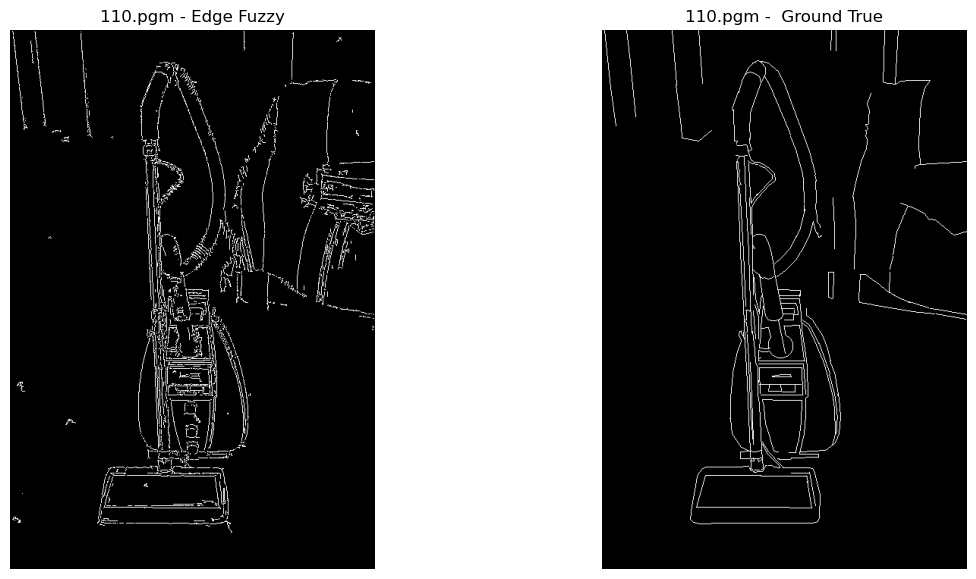

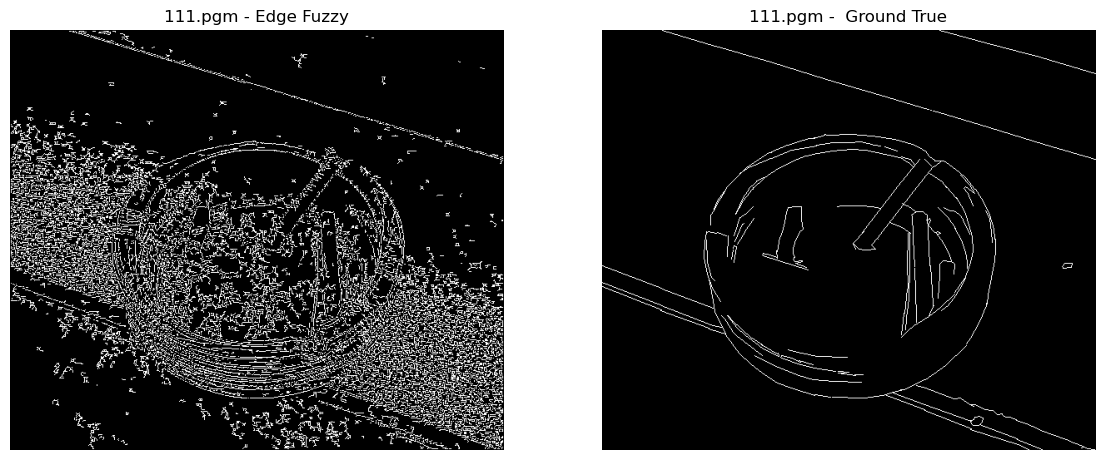

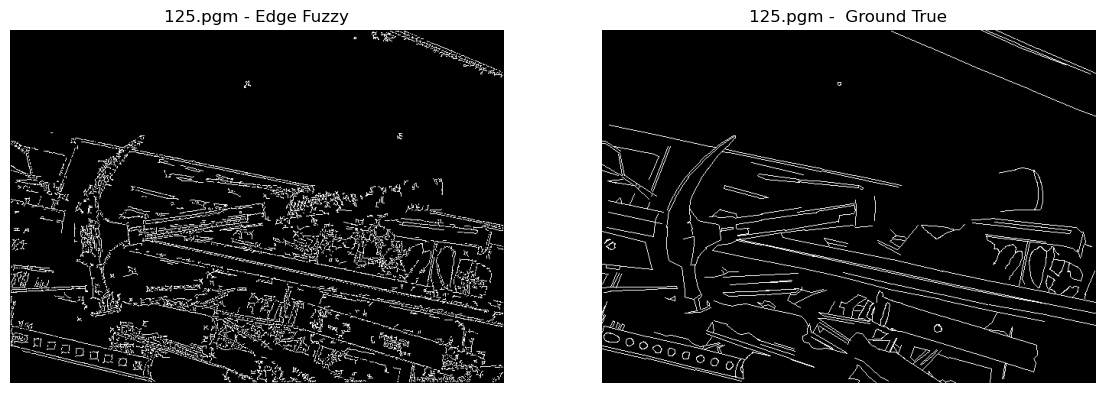

In [13]:
r=255
SE = np.array([[219, 219, 219],[219, 255, 219],[219, 219, 219]])

measure=pd.DataFrame(index=["FoM", "Precision","Recall","Acuraccy","Dice","Iou","F-Measure"])

for i in list(imagens_gray_ground)[0:10]:
    
    # Fuzzy edges
    edge_gf=mof.edge_fuzzy(imagens_gray_ground[i][0], SE,of.maxC_nM,of.minI_KD,r)
  
    #edge_gf=np.round(edge_gf*(255/np.amax(edge_gf))) 
    
    M, m, angles, ft, PC, EO, T = phasecong (edge_gf)
    edge_nms=ed.non_maximum_suppression(edge_gf,angles)
    
    # Histerese-Medina Carciner
    '''maxlevel=np.amax(edge1_nms)
    Bottom=int(np.round(15/255 *maxlevel))
    Top=int(np.round(21/255 *maxlevel))
    Step=int(np.round(5/255 *maxlevel))
    bw=histmedcar(edge1_nms,Bottom,Top,Step)'''  
    
    #Normalizando as imagens para {0,1,..,255}
    edge1_nms = np.round(edge_nms*(255/np.amax(edge_nms)))
  
    #Hystereses
    lower=15
    upper=50
    
    bw2=ht.hysterese_canny(edge1_nms,upper,lower)
    bw_canny= cv.Canny(imagens_gray_ground[i][0], upper, lower)
    
    #Graphics
    fp.plot_2Images(bw2,imagens_gray_ground[i][1],i+' - Edge Fuzzy', i+ ' -  Ground True')
    
    #Metric for comparison edge detection 
    
    value_fom=fm.fom(bw2, imagens_gray_ground[i][1])
    Precision=fm.precision_score_(imagens_gray_ground[i][1]/255, bw2/255)
    Recall=fm.recall_score_(imagens_gray_ground[i][1]/255, bw2/255)
    Acuraccy=fm.accuracy(imagens_gray_ground[i][1]/255, bw2/255)
    Dice=fm.dice_coef(imagens_gray_ground[i][1]/255, bw2/255)
    Iou=fm.iou(imagens_gray_ground[i][1]/255, bw2/255)
    F_measure = (2 * Precision * Recall) / (Precision + Recall)
    
    measure[i]=[value_fom, Precision,Recall,Acuraccy,Dice,Iou,F_measure]
    

In [6]:
measure.mean(axis=1)

FoM          0.552875
Precision    0.256900
Recall       0.311600
Acuraccy     0.934400
Dice         0.261300
Iou          0.152700
F-Measure    0.261433
dtype: float64

### Edge detection Canny

In [7]:
# import the necessary packages
import numpy as np
import argparse
import glob
import cv2
def auto_canny(image, sigma=0.33):
   # compute the median of the single channel pixel intensities
    v = np.median(image)
   # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

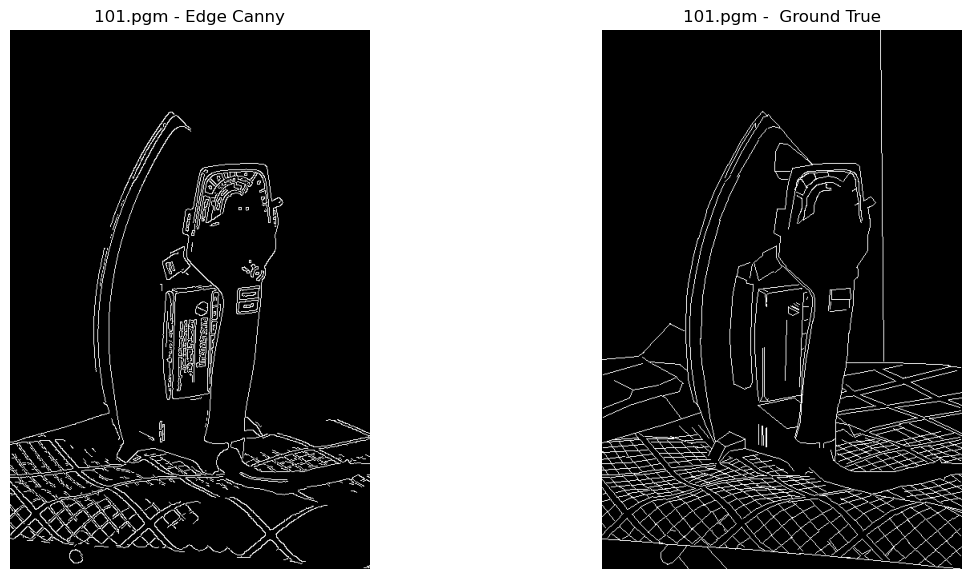

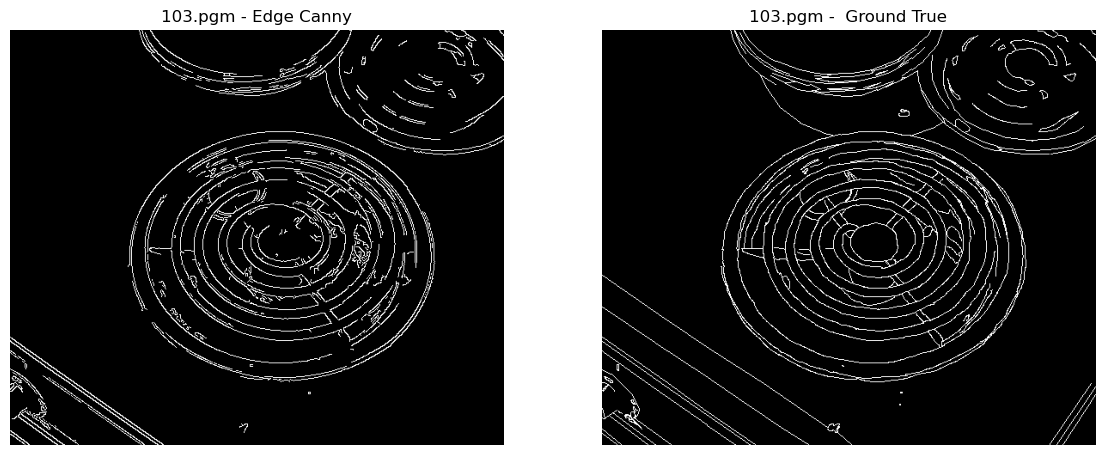

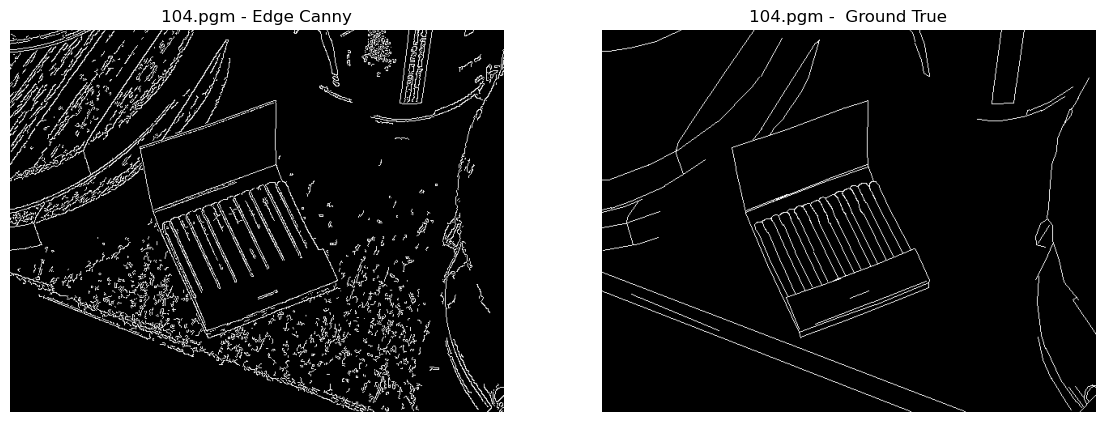

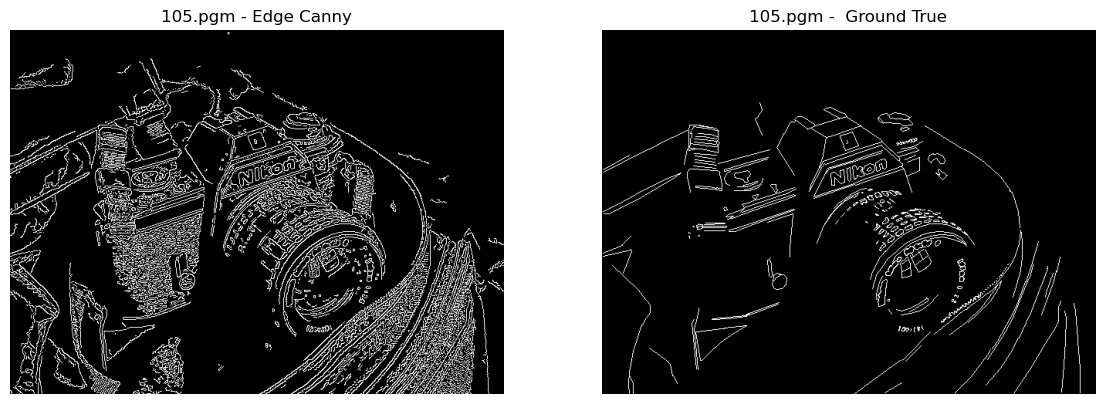

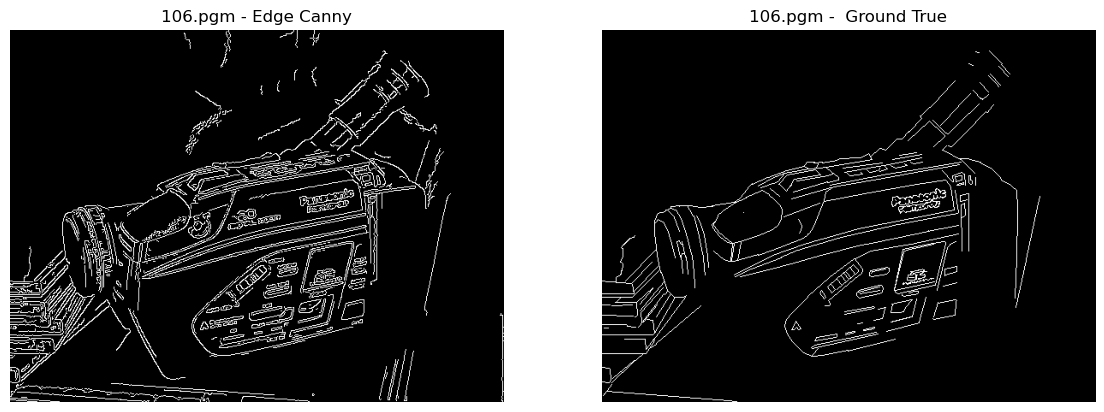

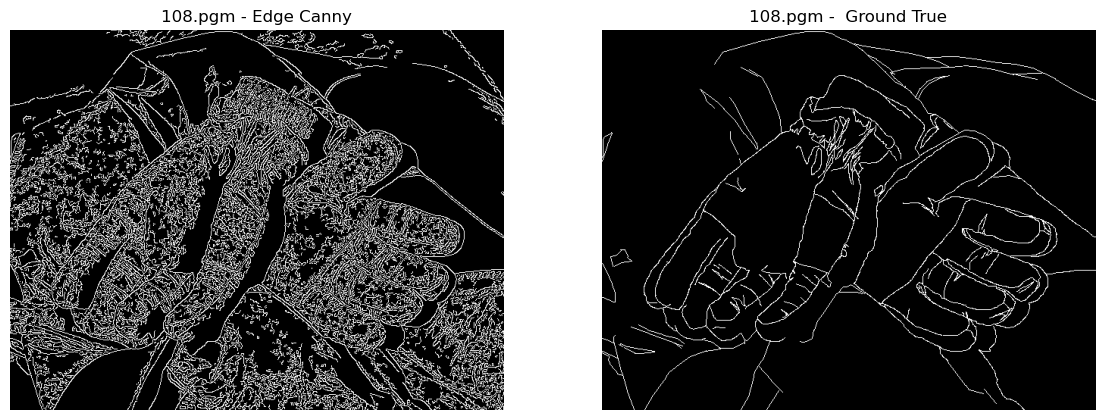

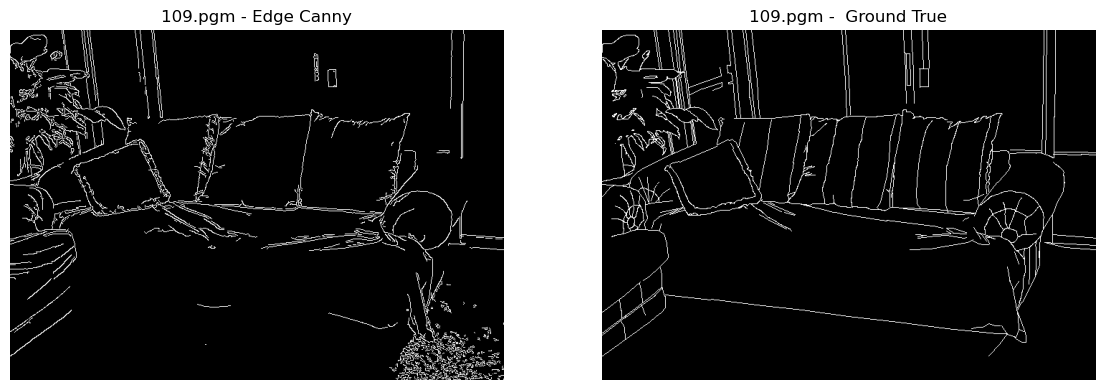

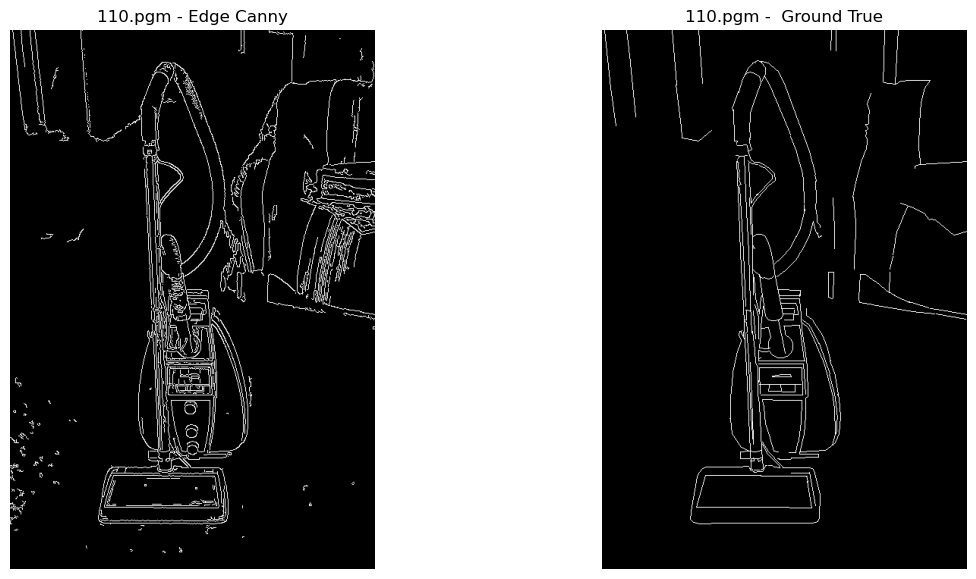

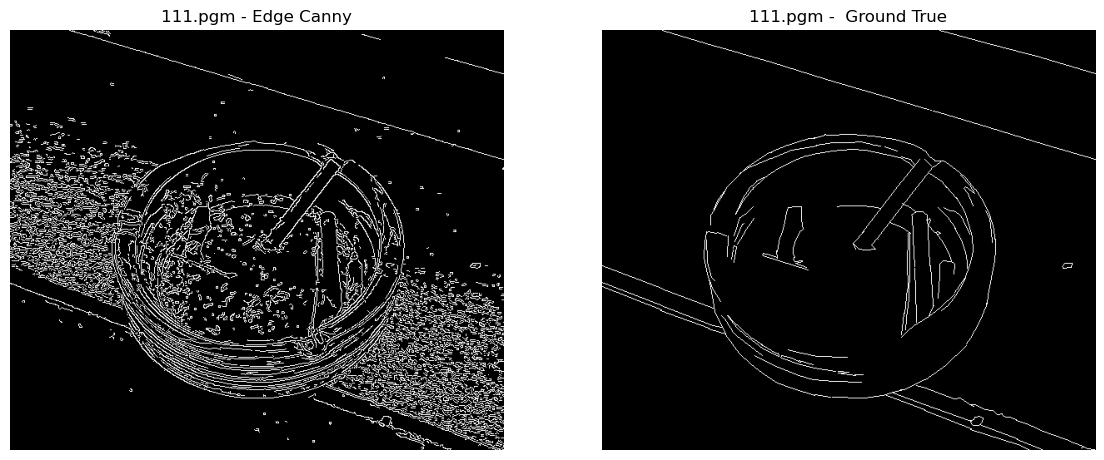

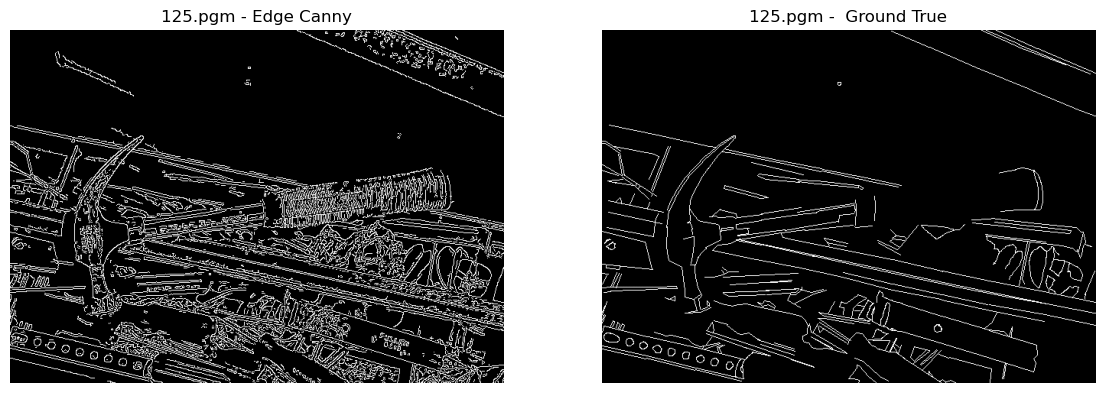

In [8]:

measure_canny=pd.DataFrame(index=["FoM", "Precision","Recall","Acuraccy","Dice","Iou","F-Measure"])

for i in list(imagens_gray_ground)[0:10]:
  
    #Hystereses
    lower=20
    upper=70
    #bw_canny= cv2.Canny(imagens_gray_ground[i][0], upper, lower)
    bw_canny= auto_canny(imagens_gray_ground[i][0])
    #Graphics
    fp.plot_2Images(bw_canny,imagens_gray_ground[i][1],i+' - Edge Canny', i+ ' -  Ground True')
    
    #Metric for comparison edge detection 
    
    value_fom=fm.fom(bw_canny, imagens_gray_ground[i][1])
    Precision=fm.precision_score_(imagens_gray_ground[i][1]/255, bw_canny)
    Recall=fm.recall_score_(imagens_gray_ground[i][1]/255, bw_canny)
    Acuraccy=fm.accuracy(imagens_gray_ground[i][1]/255, bw_canny)
    Dice=fm.dice_coef(imagens_gray_ground[i][1]/255, bw_canny)
    Iou=fm.iou(imagens_gray_ground[i][1]/255, bw_canny)
    F_measure = (2 * Precision * Recall) / (Precision + Recall)
    
    measure_canny[i]=[value_fom, Precision,Recall,Acuraccy,Dice,Iou,F_measure]
    

In [9]:
measure_canny

101.pgm     103.pgm     104.pgm     105.pgm     106.pgm  \
FoM         0.535331    0.749098    0.428654    0.471173    0.651724   
Precision   0.325000    0.403000    0.126000    0.149000    0.228000   
Recall     69.436000  106.279000  107.284000  145.749000  126.537000   
Acuraccy    0.169000    0.259000    0.058000    0.038000    0.085000   
Dice        0.648000    0.803000    0.252000    0.298000    0.456000   
Iou         0.479000    0.671000    0.144000    0.175000    0.295000   
F-Measure   0.646972    0.802955    0.251704    0.297696    0.455180   

              108.pgm    109.pgm     110.pgm     111.pgm     125.pgm  
FoM          0.367330   0.629331    0.635743    0.321736    0.594364  
Precision    0.102000   0.313000    0.275000    0.090000    0.196000  
Recall     133.165000  91.561000  148.598000  129.092000  138.151000  
Acuraccy     0.021000   0.180000    0.140000    0.037000    0.042000  
Dice         0.203000   0.623000    0.549000    0.179000    0.391000  
Iou          0.113000   0.453000    0.379000    0.098000    0.243000  
F-Measure    0.203844   0.623867    0.548984    0.179875    0.391445

In [10]:
measure_canny.mean(axis=1)

FoM            0.538448
Precision      0.220700
Recall       119.585200
Acuraccy       0.102900
Dice           0.440200
Iou            0.305000
F-Measure      0.440252
dtype: float64

In [11]:
measure.mean(axis=1)

FoM          0.552875
Precision    0.256900
Recall       0.311600
Acuraccy     0.934400
Dice         0.261300
Iou          0.152700
F-Measure    0.261433
dtype: float64